In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
df = pd.read_csv("C://Data/all.csv")

In [4]:
df.drop(['ph_PostMigratedHere','ph_UnknownSuggestionEvent','ph_QuestionMerged','ph_PostMigrated','ph_PostMigrated','p_Wiki','ph_QuestionUnmerged','ph_PostDisassociated','ph_SuggestedEditApplied','ph_UnknownDevRelatedEvent','ph_VoteNullificationByDev','ph_PostTweeted','ph_PostUnmigrated','ph_UnknownModeratorEvent','ph_UnknownEvent','ph_CommentDiscussionMovedToChat','p_PrivilegeWiki','p_WikiPlaceholder'], axis= 1, inplace=True);

In [5]:
# Create training and testing sets
df_train,df_test= train_test_split(df, test_size = 0.2, random_state = 0)
combine = [df_train,df_test]

In [6]:
print(df_train.columns.values)

['Id' 'country' 'AboutMe_length' 'activity_in_months' 'UpVotes'
 'DownVotes' 'Reputation' 'Views' 'badges' 'Q_comments' 'A_comments'
 'P_questions' 'P_answers' 'p_ModeratorNomination' 'p_TagWiki'
 'p_TagWikiExerpt' 'ph_InitialTitle' 'ph_EditTitle' 'ph_InitialBody'
 'ph_InitialTags' 'ph_EditBody' 'ph_EditTags' 'ph_RollbackTitle'
 'ph_RollbackBody' 'ph_PostReopened' 'ph_RollbackTags' 'ph_PostClosed'
 'ph_PostDeleted' 'ph_PostUndeleted' 'ph_CommunityOwned' 'ph_PostLocked'
 'ph_PostUnlocked' 'ph_QuestionUnprotected' 'ph_QuestionProtected'
 'ph_PostNoticeRemoved' 'ph_PostNoticeAdded' 'ph_PostMergeSource'
 'ph_PostMigratedAway' 'ph_PostMergeDestination']


In [7]:
df_train.info()
print("-"*50)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112147 entries, 8441 to 43567
Data columns (total 39 columns):
Id                         112147 non-null int64
country                    112147 non-null object
AboutMe_length             72567 non-null float64
activity_in_months         112147 non-null float64
UpVotes                    112147 non-null int64
DownVotes                  112147 non-null int64
Reputation                 112147 non-null int64
Views                      112147 non-null int64
badges                     112147 non-null int64
Q_comments                 29880 non-null float64
A_comments                 29880 non-null float64
P_questions                83111 non-null float64
P_answers                  82712 non-null float64
p_ModeratorNomination      18 non-null float64
p_TagWiki                  639 non-null float64
p_TagWikiExerpt            782 non-null float64
ph_InitialTitle            30676 non-null float64
ph_EditTitle               7457 non-null float64


In [8]:
df_train.describe()

,Id,AboutMe_length,activity_in_months,UpVotes,DownVotes,Reputation,Views,badges,Q_comments,A_comments,P_questions,P_answers,p_ModeratorNomination,p_TagWiki,p_TagWikiExerpt,ph_InitialTitle,ph_EditTitle,ph_InitialBody,ph_InitialTags,ph_EditBody,ph_EditTags,ph_RollbackTitle,ph_RollbackBody,ph_PostReopened,ph_RollbackTags,ph_PostClosed,ph_PostDeleted,ph_PostUndeleted,ph_CommunityOwned,ph_PostLocked,ph_PostUnlocked,ph_QuestionUnprotected,ph_QuestionProtected,ph_PostNoticeRemoved,ph_PostNoticeAdded,ph_PostMergeSource,ph_PostMigratedAway,ph_PostMergeDestination
count,1.121470e+05,72567.000000,112147.000000,112147.000000,112147.000000,112147.000000,112147.000000,112147.000000,29880.000000,29880.000000,83111.000000,82712.000000,18.000000,639.000000,782.000000,30676.000000,7457.000000,37948.000000,30672.000000,22936.000000,7423.000000,269.000000,943.000000,84.000000,329.000000,124.000000,2914.000000,2936.000000,956.000000,6.000000,6.000000,19.000000,72.000000,1109.000000,1844.000000,5.000000,5.000000,5.000000
mean,5.254029e+06,103.525253,33.385235,53.412922,6.046020,544.607034,65.527540,8.762972,7.093273,14.362483,5.081337,15.440577,1.444444,3.336463,3.372123,9.698559,11.369720,30.030041,9.695716,31.791725,15.943823,3.962825,5.135737,20.023810,2.714286,167.588710,3.586479,3.626022,3.789749,115.166667,13.833333,4.526316,15.861111,2.036970,2.399132,81.200000,66.000000,246.800000
std,3.493744e+06,240.822091,35.728919,366.203056,193.574696,6673.717768,1258.866708,34.372489,21.792996,120.308331,20.267219,255.790089,0.855585,8.367411,10.869657,28.613973,104.543527,176.049231,28.608055,254.843311,117.261008,11.919448,24.004614,57.844198,6.676118,695.274865,15.982254,17.237171,34.506737,179.208724,15.791348,9.057645,77.046594,3.491284,4.871225,114.707018,131.556072,340.281795
min,3.200000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,28.000000
25%,2.039419e+06,0.000000,2.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,25.000000,3.750000,1.000000,1.000000,1.000000,1.000000,17.000000,1.000000,61.000000
50%,4.943085e+06,22.000000,19.400000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,4.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,13.000000,1.000000,1.000000,1.000000,43.500000,8.500000,1.000000,2.000000,1.000000,1.000000,43.000000,9.000000,147.000000
75%,8.321042e+06,99.000000,58.500000,4.000000,0.000000,57.000000,13.000000,6.000000,6.000000,4.000000,3.000000,4.000000,1.750000,2.000000,2.000000,8.000000,4.000000,16.000000,8.000000,12.000000,5.000000,3.000000,3.000000,17.250000,2.000000,63.000000,2.000000,2.000000,2.000000,92.000000,15.500000,2.000000,8.250000,2.000000,2.000000,52.000000,18.000000,150.000000
max,1.200456e+07,5687.000000,134.900000,32909.000000,45436.000000,851064.000000,268394.000000,4097.000000,618.000000,9548.000000,1107.000000,59042.000000,4.000000,107.000000,227.000000,1082.000000,6279.000000,15888.000000,1080.000000,17399.000000,5527.000000,135.000000,510.000000,465.000000,79.000000,5767.000000,442.000000,518.000000,1019.000000,474.000000,44.000000,37.000000,654.000000,56.000000,143.000000,284.000000,301.000000,848.000000


In [9]:
print(df_train.columns.values)

['Id' 'country' 'AboutMe_length' 'activity_in_months' 'UpVotes'
 'DownVotes' 'Reputation' 'Views' 'badges' 'Q_comments' 'A_comments'
 'P_questions' 'P_answers' 'p_ModeratorNomination' 'p_TagWiki'
 'p_TagWikiExerpt' 'ph_InitialTitle' 'ph_EditTitle' 'ph_InitialBody'
 'ph_InitialTags' 'ph_EditBody' 'ph_EditTags' 'ph_RollbackTitle'
 'ph_RollbackBody' 'ph_PostReopened' 'ph_RollbackTags' 'ph_PostClosed'
 'ph_PostDeleted' 'ph_PostUndeleted' 'ph_CommunityOwned' 'ph_PostLocked'
 'ph_PostUnlocked' 'ph_QuestionUnprotected' 'ph_QuestionProtected'
 'ph_PostNoticeRemoved' 'ph_PostNoticeAdded' 'ph_PostMergeSource'
 'ph_PostMigratedAway' 'ph_PostMergeDestination']


**What is the distribution of categorical features?**

- country has three possible unique objects across the dataset with USA count the highest at 69636

In [10]:
df_train.describe(include =['O'])

,country
count,112147
unique,3
top,usa
freq,69636


## Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other and look at the mean. We can only do so at this stage for features which do not have any empty values.

In [11]:
df_train[['country', 'AboutMe_length']].groupby(['country'], as_index=False).mean().sort_values(by='AboutMe_length', ascending=False)

,country,AboutMe_length
2,usa,126.141182
1,russia,70.868387
0,china,49.014603


In [12]:
['Id' 'country' 'AboutMe_length' 'activity_in_months' 'UpVotes'
 'DownVotes' 'Reputation' 'Views' 'badges' 'Q_comments' 'A_comments'
 'P_questions' 'P_answers' 'p_ModeratorNomination' 'p_TagWiki'
 'p_TagWikiExerpt' 'ph_InitialTitle' 'ph_EditTitle' 'ph_InitialBody'
 'ph_InitialTags' 'ph_EditBody' 'ph_EditTags' 'ph_RollbackTitle'
 'ph_RollbackBody' 'ph_PostReopened' 'ph_RollbackTags' 'ph_PostClosed'
 'ph_PostDeleted' 'ph_PostUndeleted' 'ph_CommunityOwned' 'ph_PostLocked'
 'ph_PostUnlocked' 'ph_QuestionUnprotected' 'ph_QuestionProtected'
 'ph_PostNoticeRemoved' 'ph_PostNoticeAdded' 'ph_PostMergeSource'
 'ph_PostMigratedAway' 'ph_PostMergeDestination']

['IdcountryAboutMe_lengthactivity_in_monthsUpVotesDownVotesReputationViewsbadgesQ_commentsA_commentsP_questionsP_answersp_ModeratorNominationp_TagWikip_TagWikiExerptph_InitialTitleph_EditTitleph_InitialBodyph_InitialTagsph_EditBodyph_EditTagsph_RollbackTitleph_RollbackBodyph_PostReopenedph_RollbackTagsph_PostClosedph_PostDeletedph_PostUndeletedph_CommunityOwnedph_PostLockedph_PostUnlockedph_QuestionUnprotectedph_QuestionProtectedph_PostNoticeRemovedph_PostNoticeAddedph_PostMergeSourceph_PostMigratedAwayph_PostMergeDestination']

In [13]:
df_train[['country', 'activity_in_months']].groupby(['country'], as_index=False).mean().sort_values(by='activity_in_months', ascending=False)

,country,activity_in_months
2,usa,36.270106
1,russia,36.041291
0,china,24.821235


In [14]:
df_train[['country', 'UpVotes']].groupby(['country'], as_index=False).mean().sort_values(by='UpVotes', ascending=False)

,country,UpVotes
2,usa,67.971509
1,russia,57.358523
0,china,15.112629


In [15]:
df_train[['country', 'DownVotes']].groupby(['country'], as_index=False).mean().sort_values(by='DownVotes', ascending=False)

,country,DownVotes
2,usa,8.554081
1,russia,3.581173
0,china,1.083023


In [16]:
df_train[['country', 'Reputation']].groupby(['country'], as_index=False).mean().sort_values(by='Reputation', ascending=False)

,country,Reputation
2,usa,726.455942
1,russia,432.343258
0,china,150.207058


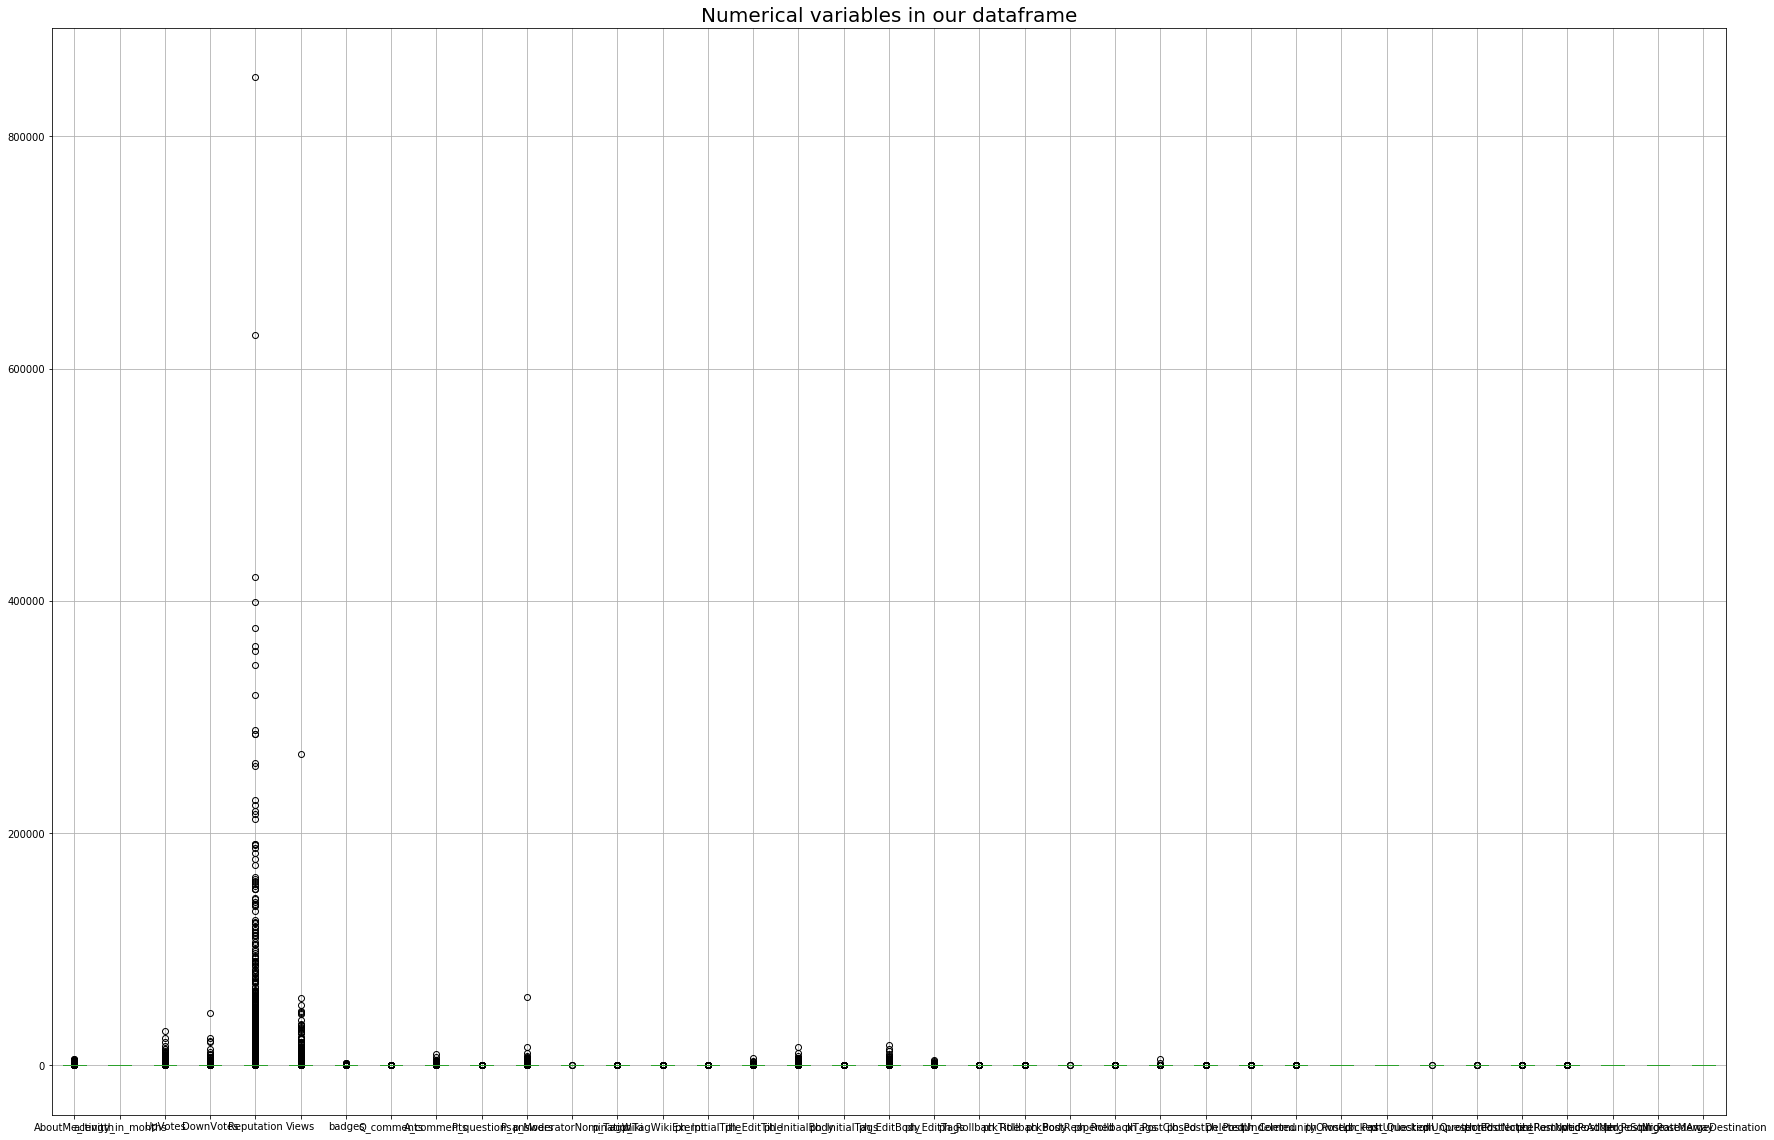

In [29]:
num_cols = ['AboutMe_length','activity_in_months','UpVotes','DownVotes','Reputation','Views','badges','Q_comments','A_comments','P_questions','P_answers','p_ModeratorNomination','p_TagWiki','p_TagWikiExerpt','ph_InitialTitle','ph_EditTitle','ph_InitialBody','ph_InitialTags','ph_EditBody','ph_EditTags','ph_RollbackTitle','ph_RollbackBody','ph_PostReopened','ph_RollbackTags','ph_PostClosed','ph_PostDeleted','ph_PostUndeleted','ph_CommunityOwned','ph_PostLocked','ph_PostUnlocked','ph_QuestionUnprotected','ph_QuestionProtected','ph_PostNoticeRemoved','ph_PostNoticeAdded','ph_PostMergeSource','ph_PostMigratedAway','ph_PostMergeDestination']
plt.figure(figsize=(30,20))
df[num_cols].boxplot()
plt.title("Numerical variables in our dataframe", fontsize=20)
plt.show()

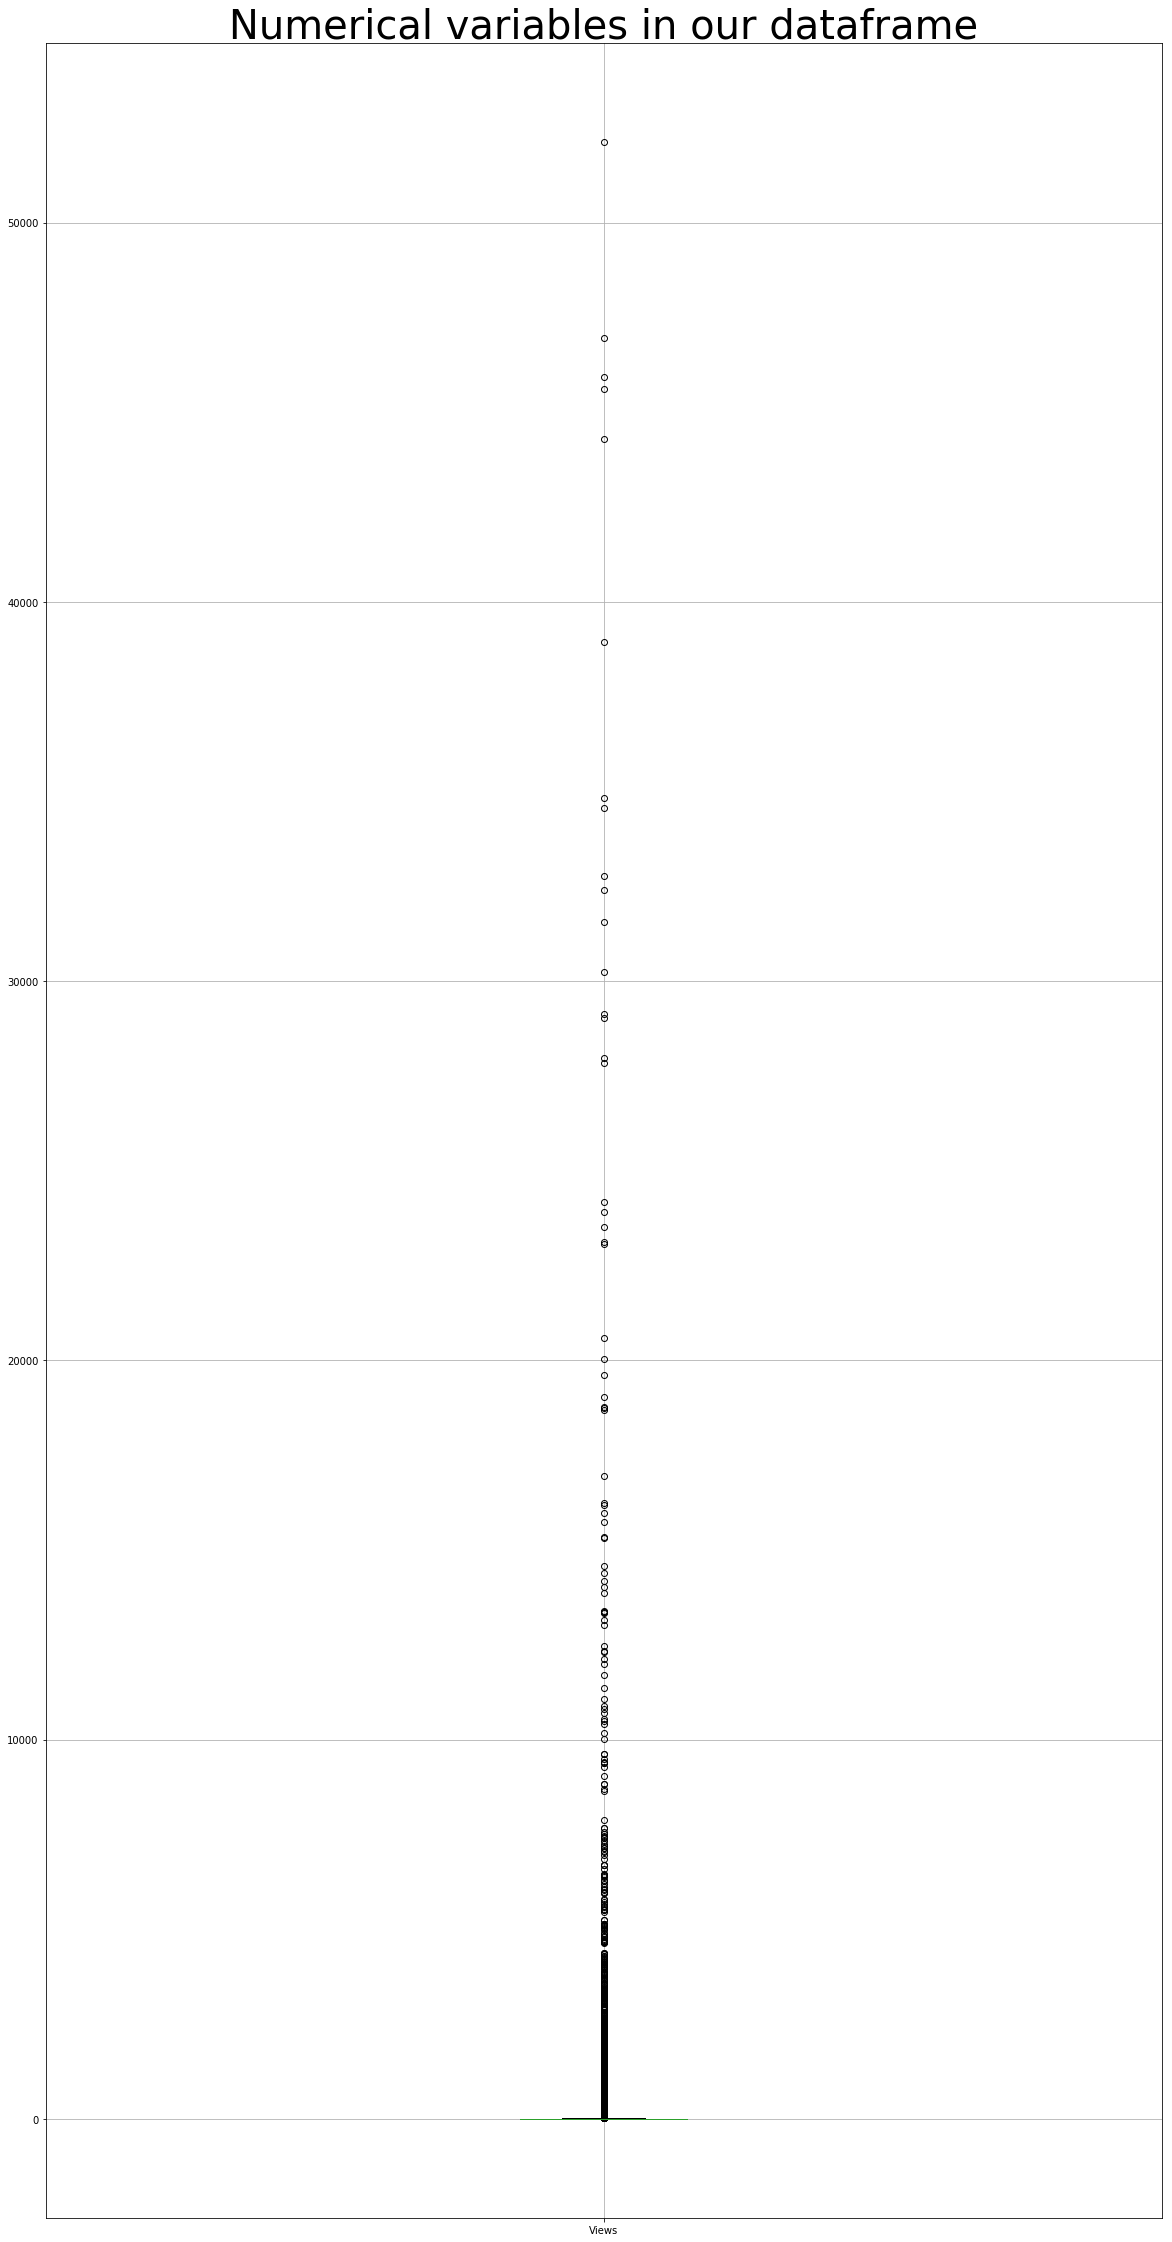

In [50]:
num_cols = ['Views']
plt.figure(figsize=(20,40))
df[num_cols].boxplot()
plt.title("Numerical variables in our dataframe", fontsize=40)
plt.show()

In [ ]:
df[df.DownVotes > 40000] = None;
df[df.Reputation > 600000] = None;

In [47]:
df[df.Views > 200000]

,Id,country,AboutMe_length,activity_in_months,UpVotes,DownVotes,Reputation,Views,badges,Q_comments,A_comments,P_questions,P_answers,p_ModeratorNomination,p_TagWiki,p_TagWikiExerpt,ph_InitialTitle,ph_EditTitle,ph_InitialBody,ph_InitialTags,ph_EditBody,ph_EditTags,ph_RollbackTitle,ph_RollbackBody,ph_PostReopened,ph_RollbackTags,ph_PostClosed,ph_PostDeleted,ph_PostUndeleted,ph_CommunityOwned,ph_PostLocked,ph_PostUnlocked,ph_QuestionUnprotected,ph_QuestionProtected,ph_PostNoticeRemoved,ph_PostNoticeAdded,ph_PostMergeSource,ph_PostMigratedAway,ph_PostMergeDestination


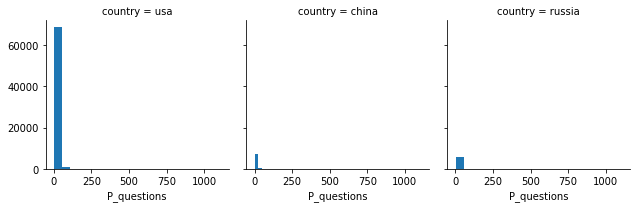

In [26]:
g = sns.FacetGrid(df_train, col='country')
g.map(plt.hist, 'P_questions', bins=20)

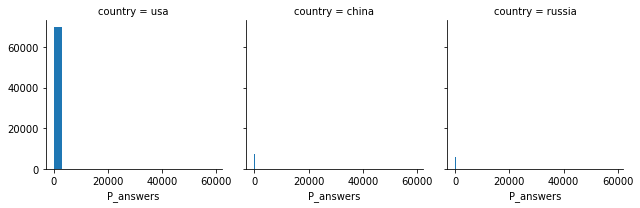

In [27]:
g = sns.FacetGrid(df_train, col='country')
g.map(plt.hist, 'P_answers', bins=20)

In [ ]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();